In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import json
import glob, os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
plt.rcParams.update({'font.size': 10})

In [3]:
def define_plot_pos(ax):
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('z (m)')
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(0,6)
    plt.legend()
    plt.show()

In [4]:
def define_plot_col(ax):
    plt.xlabel('Time (s)')
    plt.ylabel('Collisions (bool)')
    plt.legend()
    plt.show()

# Plots for the first experiment comparing the complicated path with the remote controller and hand interface

In [5]:
path_to_folder = "./Initial_Arena/"
subjects = glob.glob(path_to_folder + "*/")

In [6]:
def appendDF(file, logs):
    with open(file) as f:
        temp = []
        for line in f:
                temp.append(json.loads(line))
        df = pd.io.json.json_normalize(temp[0]['allLogs'])
        df.columns = df.columns.map(lambda x: x.split("*.")[-1])
        logs.append(df)

In [7]:
controller_fps = []
controller_tps = []
hand_fps = []
hand_tps = []

for subject in subjects:
    print(subject)
    files = glob.glob(subject+"*.json")
    for file in files:
        print(file)
        if "Controller_FPS" in file:
            appendDF(file, controller_fps)
        elif "Controller_TPS" in file:
            appendDF(file, controller_tps)
        elif "MotionCapture_FPS" in file:
            appendDF(file, hand_fps)
        elif "MotionCapture_TPS" in file:
            appendDF(file, hand_tps)

./Initial_Arena/Yann/
./Initial_Arena/Yann/Controller_TPS.json
./Initial_Arena/Yann/Controller_FPS.json
./Initial_Arena/Yann/MotionCapture_TPS.json
./Initial_Arena/Yann/MotionCapture_FPS.json
./Initial_Arena/Antoine/
./Initial_Arena/Antoine/Controller_TPS.json
./Initial_Arena/Antoine/Controller_FPS.json
./Initial_Arena/Antoine/MotionCapture_TPS.json
./Initial_Arena/Antoine/MotionCapture_FPS.json
./Initial_Arena/Thomas/
./Initial_Arena/Thomas/Controller_TPS.json
./Initial_Arena/Thomas/Controller_FPS.json
./Initial_Arena/Thomas/MotionCapture_TPS.json
./Initial_Arena/Thomas/MotionCapture_FPS.json


In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221, projection='3d')
for i in range(len(hand_tps)):
    ax.scatter(hand_tps[i]['dronePosition.x'],hand_tps[i]['dronePosition.z'],hand_tps[i]['dronePosition.y'], label='HAND/TPS'+', subject '+str(i))
define_plot_pos(ax)

ax = fig.add_subplot(222, projection='3d')
for i in range(len(controller_tps)):
    ax.scatter(controller_tps[i]['dronePosition.x'],controller_tps[i]['dronePosition.z'],controller_tps[i]['dronePosition.y'], label='JOY/TPS'+', subject '+str(i))
define_plot_pos(ax)

ax = fig.add_subplot(223, projection='3d')
for i in range(len(hand_fps)):
    ax.scatter(hand_fps[i]['dronePosition.x'],hand_fps[i]['dronePosition.z'],hand_fps[i]['dronePosition.y'], label='HAND/FPS'+', subject '+str(i))
define_plot_pos(ax)

ax = fig.add_subplot(224, projection='3d')
for i in range(len(controller_fps)):
    ax.scatter(controller_fps[i]['dronePosition.x'],controller_fps[i]['dronePosition.z'],controller_fps[i]['dronePosition.y'], label='JOY/FPS'+', subject '+str(i))
define_plot_pos(ax)

fig.suptitle('Drone Trajectory')
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
for i in range(len(hand_tps)):
    ax.plot(hand_tps[i]['absoluteTime'],hand_tps[i]['collision'], label='HAND/TPS'+', subject '+str(i))
define_plot_col(ax)

ax = fig.add_subplot(222)
for i in range(len(controller_tps)):
    ax.plot(controller_tps[i]['absoluteTime'],controller_tps[i]['collision'], label='JOY/TPS'+', subject '+str(i))
define_plot_col(ax)

ax = fig.add_subplot(223)
for i in range(len(hand_fps)):
    ax.plot(hand_fps[i]['absoluteTime'],hand_fps[i]['collision'], label='HAND/FPS'+', subject '+str(i))
define_plot_col(ax)

ax = fig.add_subplot(224)
for i in range(len(controller_fps)):
    ax.plot(controller_fps[i]['absoluteTime'],controller_fps[i]['collision'], label='JOY/FPS'+', subject '+str(i))
define_plot_col(ax)

fig.suptitle('Drone Collisions')
plt.show()

In [ ]:
fig, ax = plt.subplots(1,1) 
val = np.zeros((3,4))

for i in range(len(hand_tps)):
    val[i][0] = np.sum(hand_tps[i]['collision'])
    val[i][1] = np.sum(hand_fps[i]['collision'])
    val[i][2] = np.sum(controller_tps[i]['collision'])
    val[i][3] = np.sum(controller_fps[i]['collision'])

ax.scatter(range(4), val[0][:], label='Subject 1', marker='x', s=130)
ax.scatter(range(4), val[1][:], label='Subject 2', marker='o', s=100)
ax.scatter(range(4), val[2][:], label='Subject 3', marker='^', s=100)

# Set number of ticks for x-axis
ax.set_xticks(range(4))
# Set ticks labels for x-axis
ax.set_xticklabels(['Hand, TPS', 'Hand, FPS', 'Controller, TPS', 'Controller, FPS'], rotation=45, fontsize=12)
plt.ylabel('Number of collisions')

plt.tight_layout()
plt.legend()
plt.grid(True)
plt.savefig('iniarena_colli.png')
#plt.show()

# Plots for the first experiment comparing the 3 easier paths with the remote controller and hand interface

In [ ]:
path_to_folder = "./3_Paths/"
subjects = glob.glob(path_to_folder + "*/")

In [ ]:
types = ["Controller_FPS_Path_1",
         "Controller_FPS_Path_2",
         "Controller_FPS_Path_3",
         "Controller_TPS_Path_1",
         "Controller_TPS_Path_2",
         "Controller_TPS_Path_3",
         "MotionCapture_FPS_Path_1",
         "MotionCapture_FPS_Path_2",
         "MotionCapture_FPS_Path_3",
         "MotionCapture_TPS_Path_1",
         "MotionCapture_TPS_Path_2",
         "MotionCapture_TPS_Path_3"]

logs = {}
for curr in types:
    logs[curr] = []

In [ ]:
for subject in subjects:
    print(subject)
    files = glob.glob(subject+"*.json")
    for idx,file in enumerate(files):
        for cur_type in types:
            # to take only file name without path and .json extension
            if os.path.basename(file)[:-5] == cur_type:
                with open(file) as f:
                    temp = []
                    for line in f:
                        temp.append(json.loads(line))
                df = pd.io.json.json_normalize(temp[0]['allLogs'])
                df.columns = df.columns.map(lambda x: x.split("*.")[-1])
                logs[cur_type].append(df)

In [ ]:
path = "_Path_3"
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(221, projection='3d')
for idx,log in enumerate(logs['Controller_FPS'+path]):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label='Controller, FPS, '+path+', subject '+str(idx))
define_plot_pos(ax)

ax = fig.add_subplot(222, projection='3d')
for idx,log in enumerate(logs['Controller_TPS'+path]):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label='Controller, TPS, '+path+', subject '+str(idx))
define_plot_pos(ax)

ax = fig.add_subplot(223, projection='3d')
for idx,log in enumerate(logs['MotionCapture_FPS'+path]):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label='MotionCapture, FPS, '+path+', subject '+str(idx))
define_plot_pos(ax)

ax = fig.add_subplot(224, projection='3d')
for idx,log in enumerate(logs['MotionCapture_TPS'+path]):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label='MotionCapture, TPS, '+path+', subject '+str(idx))
define_plot_pos(ax)

fig.suptitle('Drone Trajectory')
plt.show()

In [ ]:
path = "_Path_3"
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(221)
for idx,log in enumerate(logs['Controller_FPS'+path]):
    ax.plot(log['absoluteTime'],log['collision'], label='Controller, FPS '+path+', subject '+str(idx))
define_plot_col(ax)

ax = fig.add_subplot(222)
for idx,log in enumerate(logs['Controller_TPS'+path]):
    ax.plot(log['absoluteTime'],log['collision'], label='Controller, TPS '+path+', subject '+str(idx))
define_plot_col(ax)

ax = fig.add_subplot(223)
for idx,log in enumerate(logs['MotionCapture_FPS'+path]):
    ax.plot(log['absoluteTime'],log['collision'], label='MotionCapture, FPS '+path+', subject '+str(idx))
define_plot_col(ax)

ax = fig.add_subplot(224)
for idx,log in enumerate(logs['MotionCapture_TPS'+path]):
    ax.plot(log['absoluteTime'],log['collision'], label='MotionCapture, TPS, '+path+', subject '+str(idx))
define_plot_col(ax)

fig.suptitle('Drone Trajectory')
plt.show()

# Plots for the learning curve experiment

In [8]:
path_to_folder = "./Learning_Curve/"
subjects = glob.glob(path_to_folder + "*/")

types = ["Controller_First",
         "Controller_Last",
         "MotionCapture_First",
         "MotionCapture_Last"]

view = "FPS"

logs = {}
for curr in types:
    logs[curr] = []

In [9]:
def appendToLogs(file, log, _type):
    with open(file) as f:
        temp = []
        for line in f:
            temp.append(json.loads(line))
        df = pd.io.json.json_normalize(temp[0]['allLogs'])
        df.columns = df.columns.map(lambda x: x.split("*.")[-1])
        log[_type].append(df)

In [10]:
for subject in subjects:
    print(subject)
    files = glob.glob(subject+"*.json")
    for idx,file in enumerate(files):
        if ("FirstTry" in file and "MotionCapture" in file and view in file):
            curtype = types[2]
            appendToLogs(file, logs, curtype)
        elif ("LastTry" in file and "MotionCapture" in file and view in file):
            curtype = types[3]
            appendToLogs(file, logs, curtype)
        elif ("FirstTry" in file and "Controller" in file and view in file):
            curtype = types[0]
            appendToLogs(file, logs, curtype)
        elif ("LastTry" in file and "Controller" in file and view in file):
            curtype = types[1]
            appendToLogs(file, logs, curtype)

./Learning_Curve/Alexandre/
./Learning_Curve/Thomus/
./Learning_Curve/Gybran/
./Learning_Curve/Ulysse/
./Learning_Curve/Jacques/
./Learning_Curve/Lucas/
./Learning_Curve/Thibault/


In [11]:
X_LIM = -2
Z_LIM = 2

In [12]:
#filter values before first obstacle and after last to compare exactly the same path
for setup in logs:
    print('processing '+setup)
    for df in logs[setup]:
        mask_low = df['dronePosition.x'] < X_LIM
        mask_high = df['dronePosition.z'] > Z_LIM
        df.drop(df.index[~(mask_low == mask_high)], inplace=True)

processing Controller_First
processing Controller_Last
processing MotionCapture_First
processing MotionCapture_Last


<IPython.core.display.Javascript object>


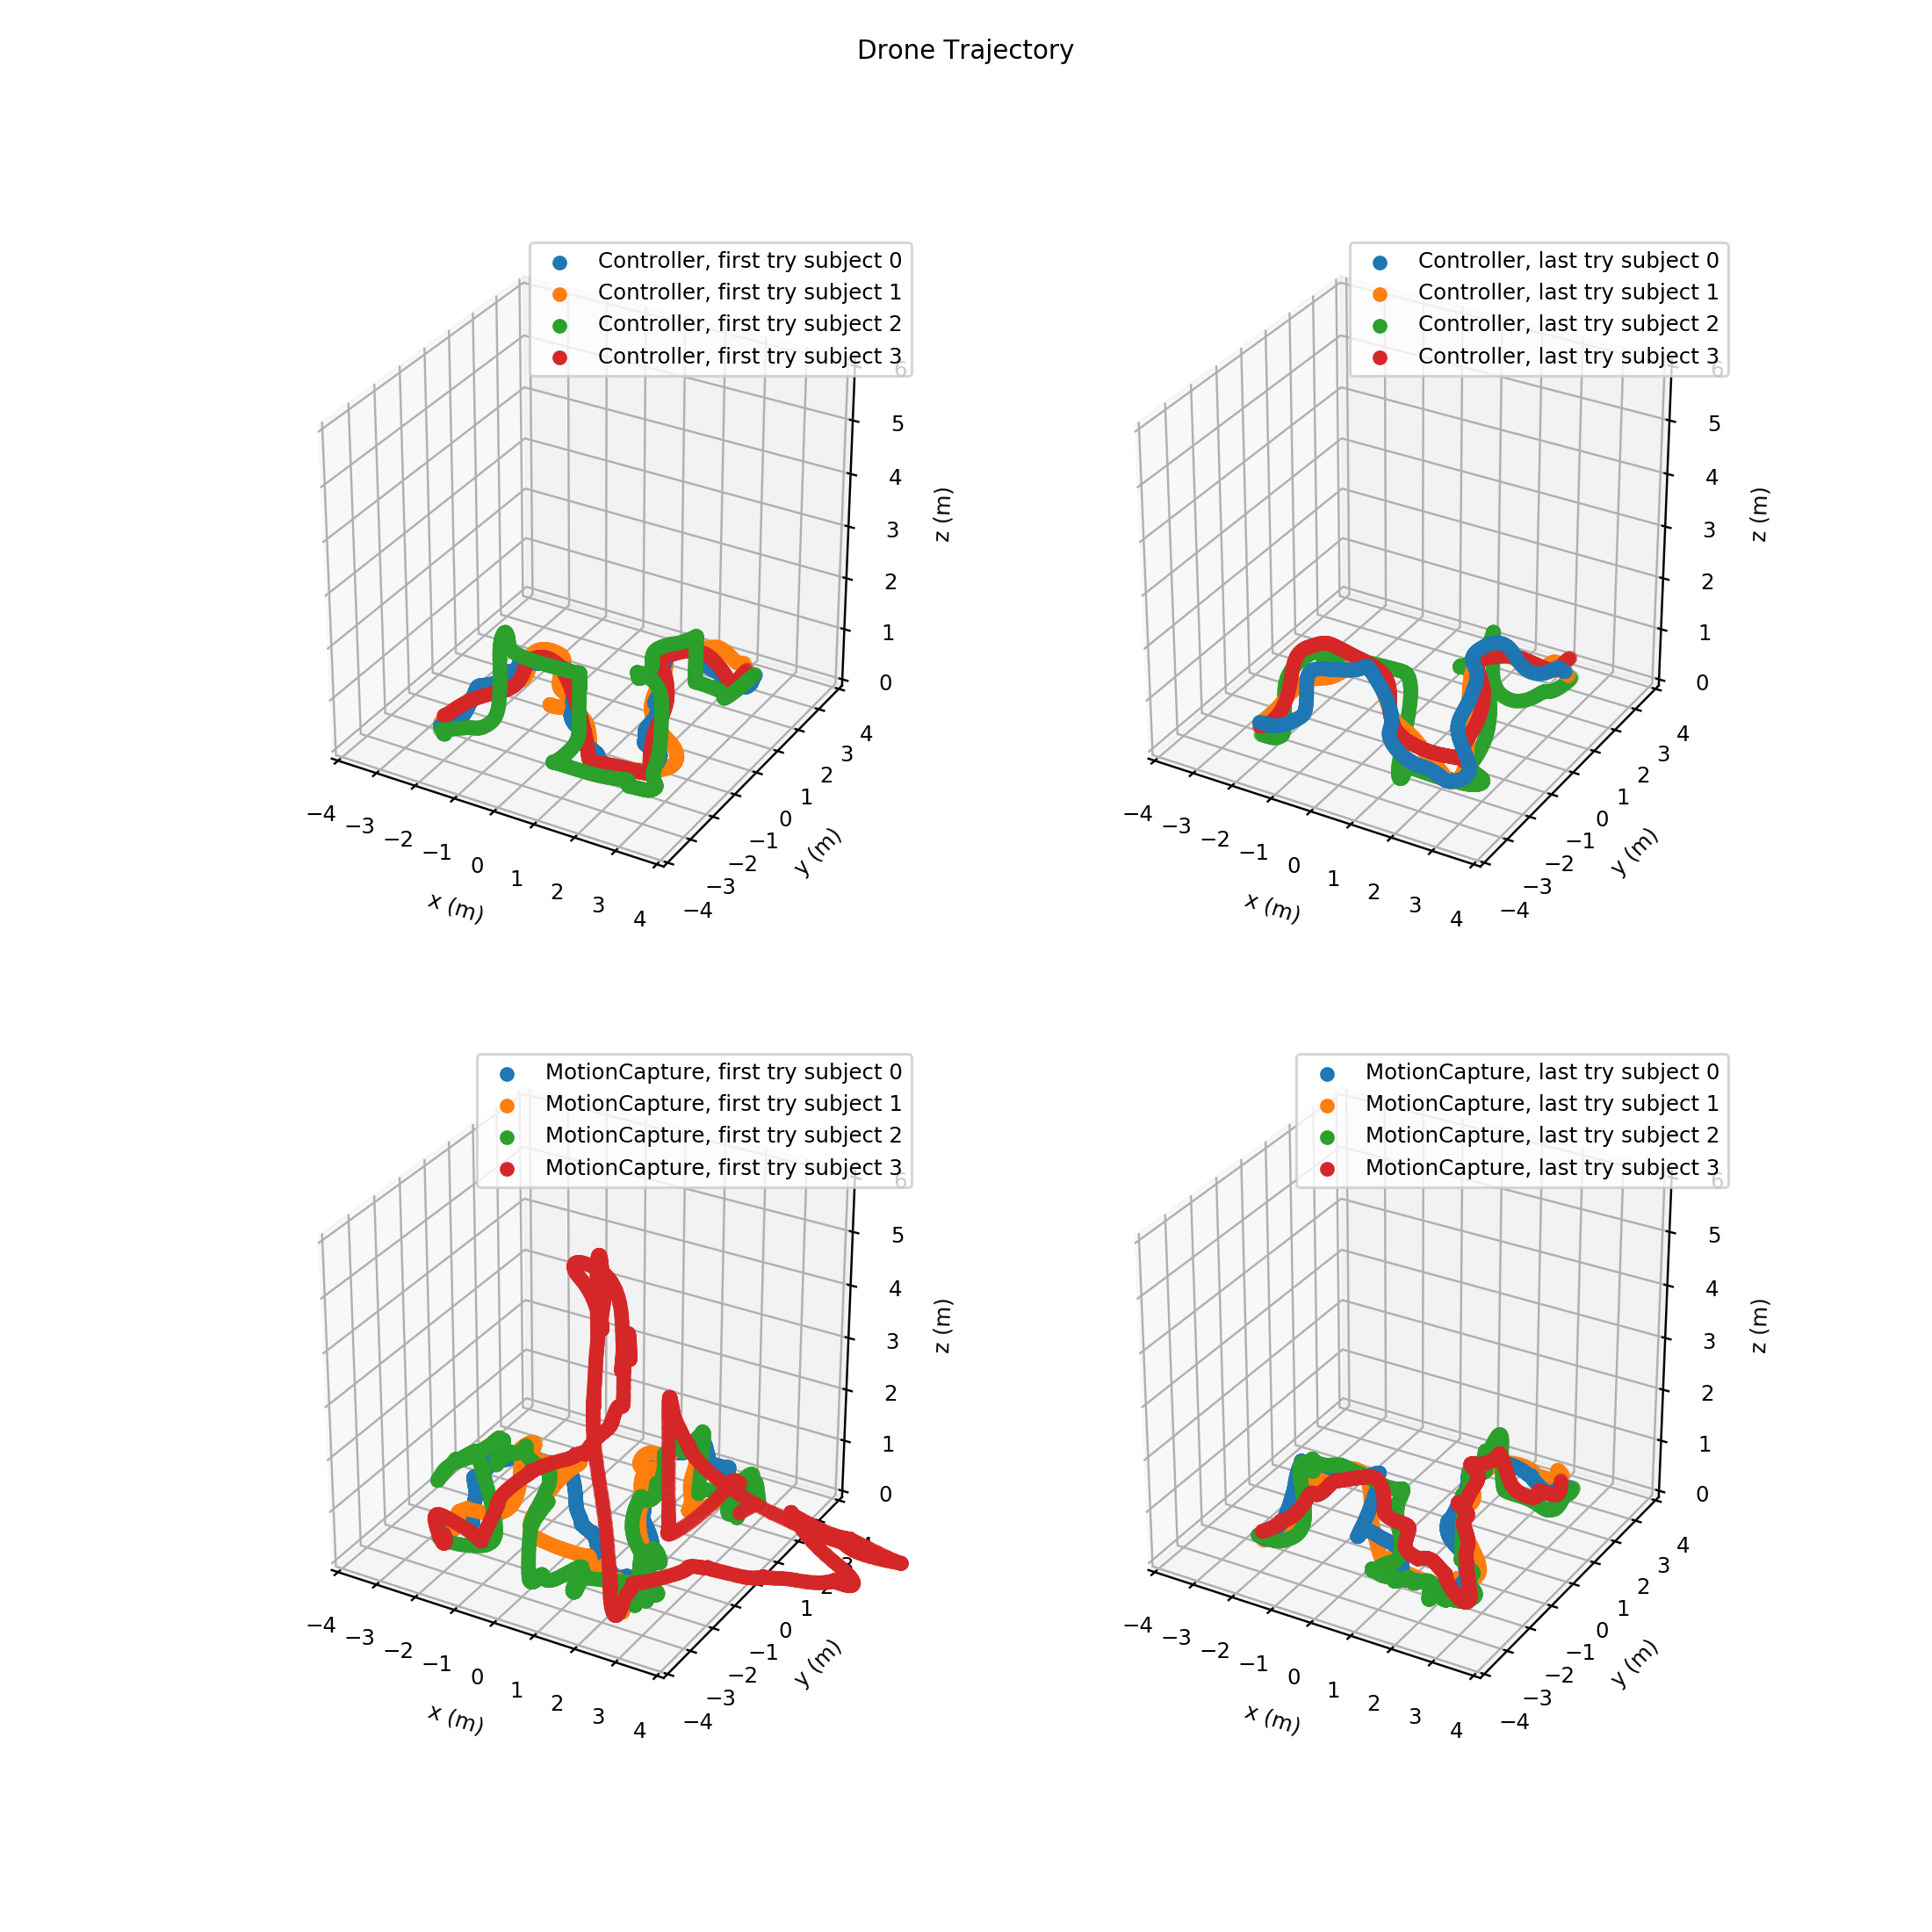

In [13]:
fig = plt.figure(figsize=(10,10))

plt.rcParams.update({'font.size': 8})

ax = fig.add_subplot(221, projection='3d')
for idx,log in enumerate(logs['Controller_First']):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label='Controller, first try subject '+str(idx))
define_plot_pos(ax)

ax = fig.add_subplot(222, projection='3d')
for idx,log in enumerate(logs['Controller_Last']):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label='Controller, last try subject '+str(idx))
define_plot_pos(ax)

ax = fig.add_subplot(223, projection='3d')
for idx,log in enumerate(logs['MotionCapture_First']):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label='MotionCapture, first try subject '+str(idx))
define_plot_pos(ax)

ax = fig.add_subplot(224, projection='3d')
for idx,log in enumerate(logs['MotionCapture_Last']):
    ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label='MotionCapture, last try subject '+str(idx))
define_plot_pos(ax)

fig.suptitle('Drone Trajectory')
#plt.savefig('compare_learn.jpg')
plt.show()

# Analyze control input for learning curve experiment

In [14]:
# add control input column
for setup in logs:
    print('processing '+setup)
    for df in logs[setup]:
        df['controlInput'] = np.power(np.linalg.norm([df['controlSpeed.x'],df['controlSpeed.y'],df['controlSpeed.z']]),2)*df['differentialTime']

processing Controller_First
processing Controller_Last
processing MotionCapture_First
processing MotionCapture_Last


In [15]:
def define_ctr_plot(ax):
    ax.set_ylim((0,100))
    plt.xlabel('Time (s)')
    plt.ylabel('Control input')
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


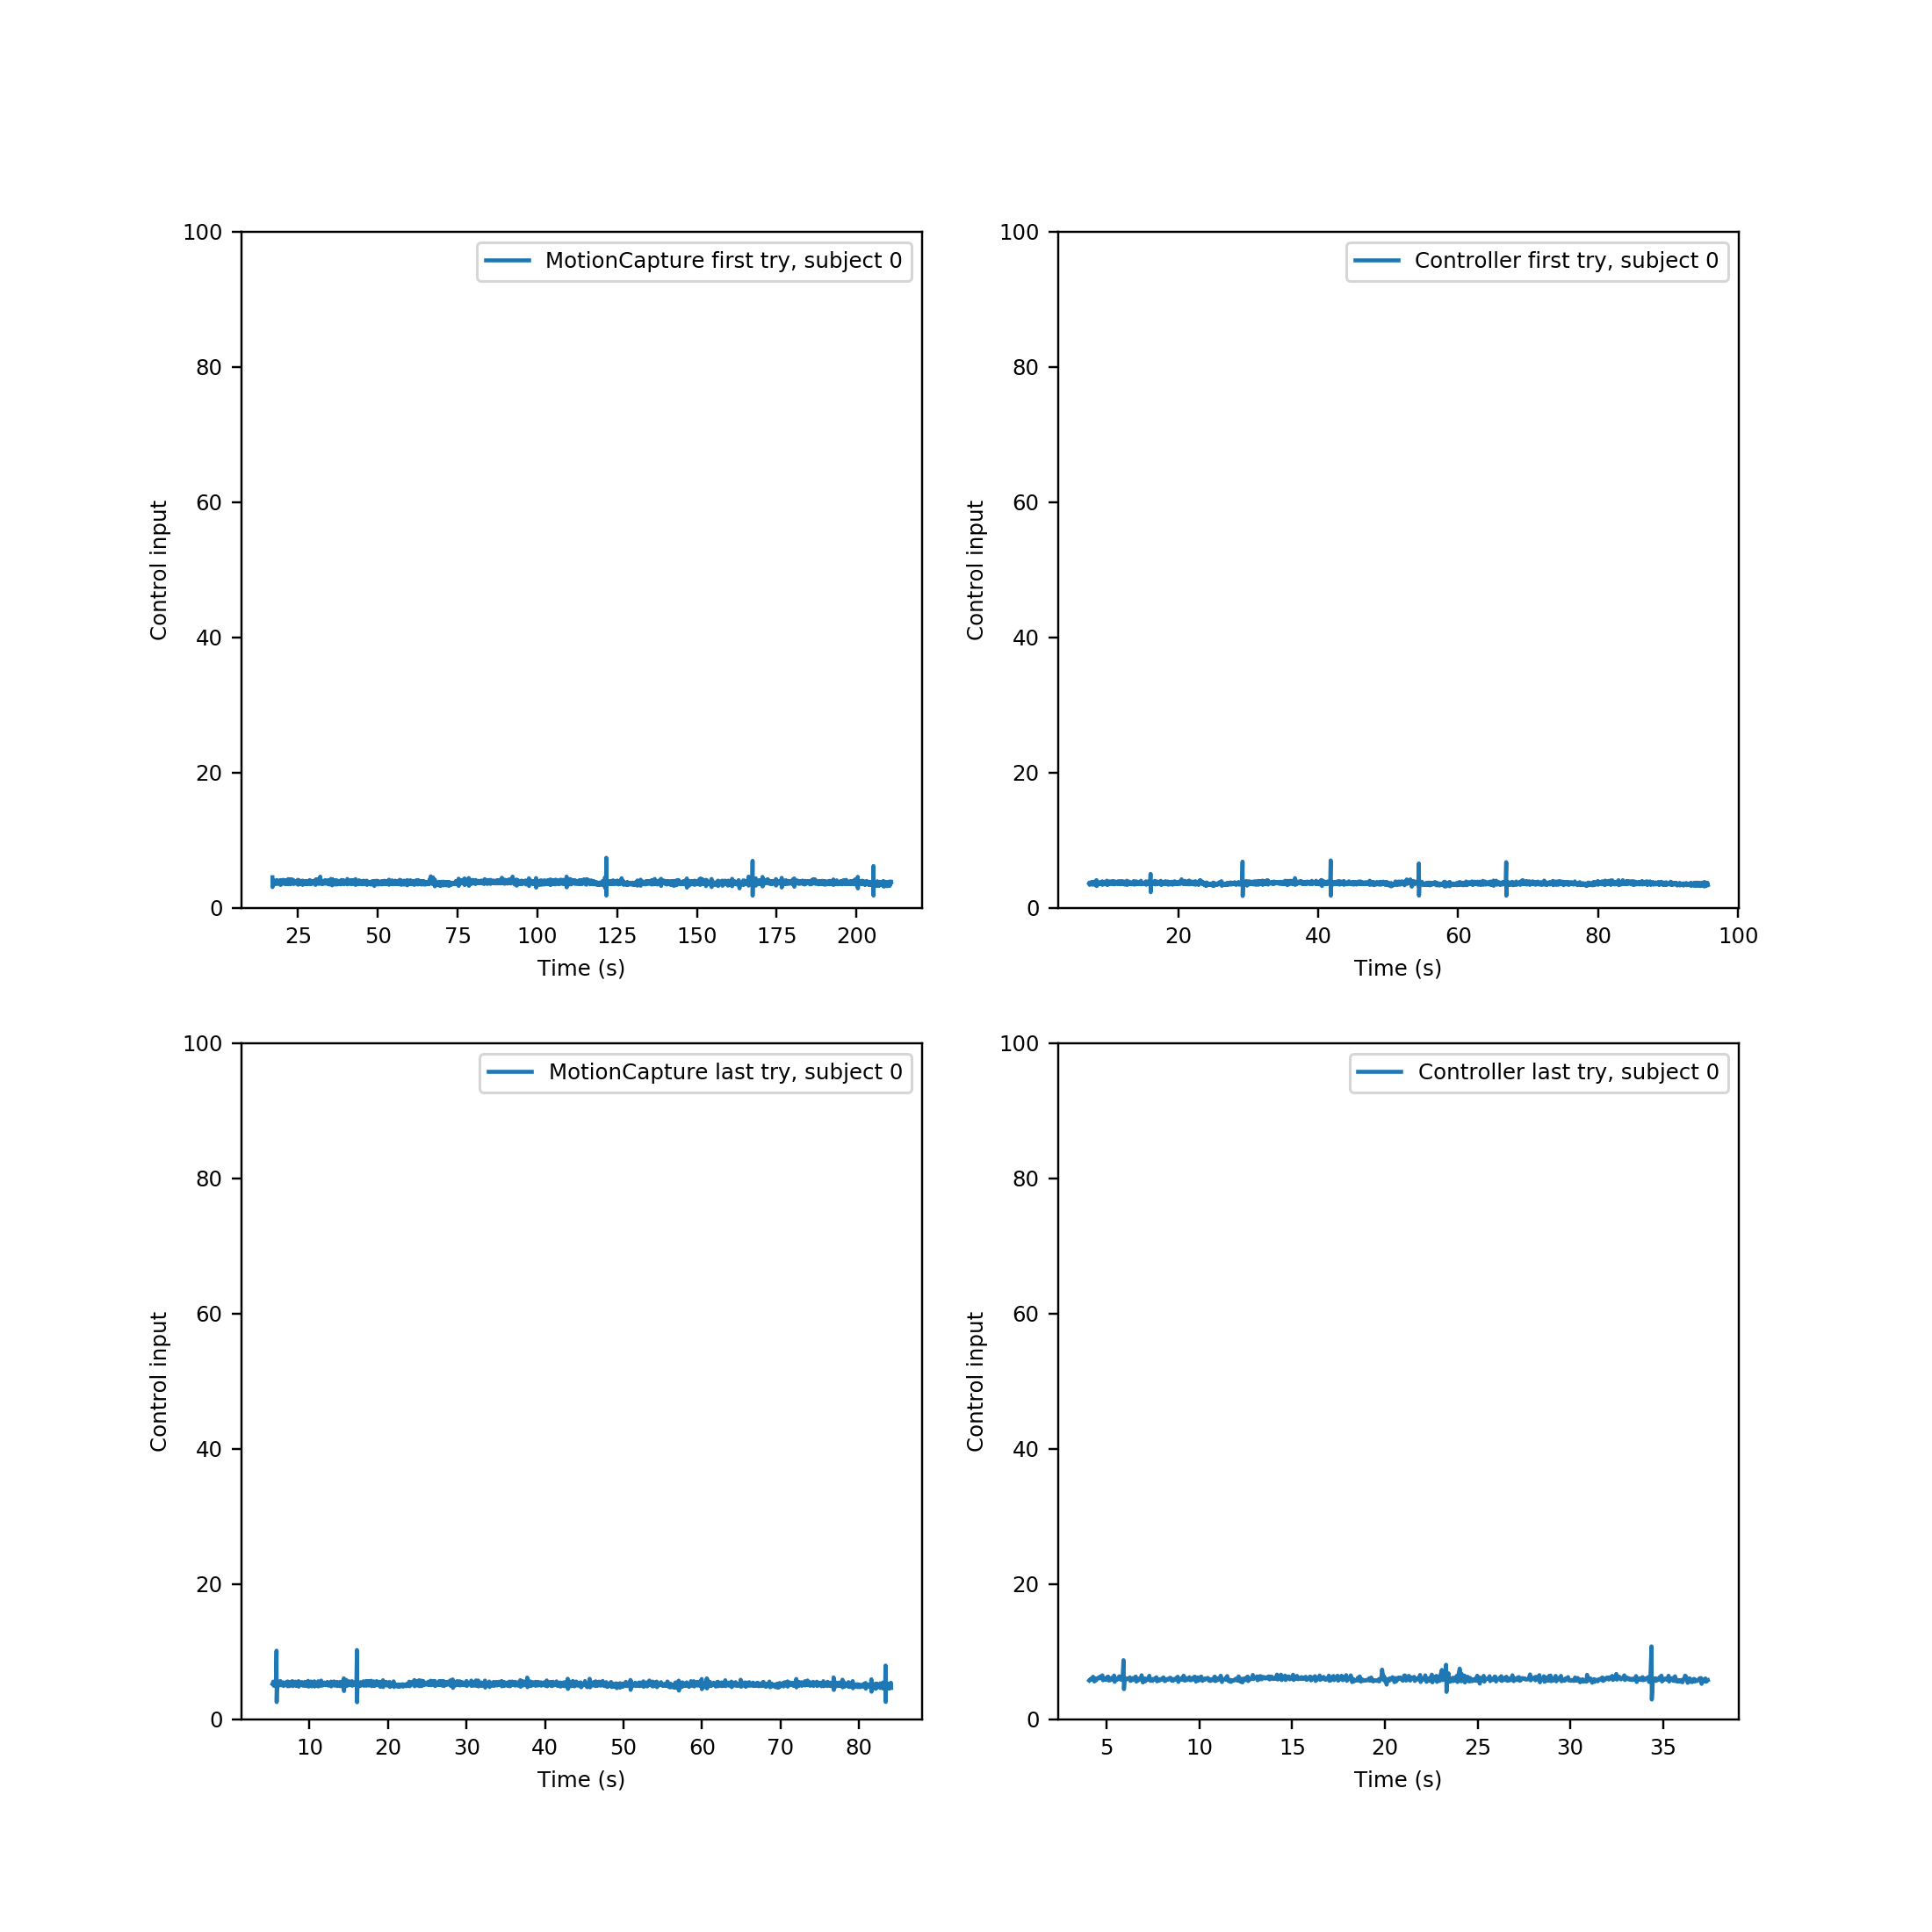

In [16]:
fig = plt.figure(figsize=(10,10))

# define the subject
n=0

ax = fig.add_subplot(221)
ax.plot(logs['MotionCapture_First'][n]['absoluteTime'], logs['MotionCapture_First'][n]['controlInput'], label='MotionCapture first try, subject '+str(n))
define_ctr_plot(ax)
ax = fig.add_subplot(222)
ax.plot(logs['Controller_First'][n]['absoluteTime'], logs['Controller_First'][n]['controlInput'],label='Controller first try, subject '+str(n))
define_ctr_plot(ax)
ax = fig.add_subplot(223)
ax.plot(logs['MotionCapture_Last'][n]['absoluteTime'], logs['MotionCapture_Last'][n]['controlInput'],label='MotionCapture last try, subject '+str(n))
define_ctr_plot(ax)
ax = fig.add_subplot(224)
ax.plot(logs['Controller_Last'][n]['absoluteTime'], logs['Controller_Last'][n]['controlInput'],label='Controller last try, subject '+str(n))
define_ctr_plot(ax)

# Analyze collisions for learning curve experiment

In [ ]:
av_collisions = {"Controller_First" : 0,
                      "Controller_Last" : 0,
                      "MotionCapture_First" : 0,
                      "MotionCapture_Last" : 0}

In [ ]:
# sum number of collisions per type
for setup in logs:
    print('processing '+setup)
    temp = 0
    for df in logs[setup]:
        temp += np.sum(np.diff(df['collision'])==1)
    av_collisions[setup] = temp / len(logs[setup])

In [ ]:
fig = plt.figure()
plt.bar(av_collisions.keys(), av_collisions.values(), color='g')
plt.ylabel('Mean number of collisions per subject')
plt.show()

# Get the mean response time for tactile experiment

In [ ]:
folder = "../../Bidirectional_Interface/Bidirectional_interface/Haptics/Experiment_Tactile/results_time/"
files = [i for i in glob.glob(folder+"*.csv")]
combined_csv = pd.concat([pd.read_csv(f, dtype=float).transpose() for f in files ], sort=False)
combined_csv.columns = ['times']
print("total number of trials : ", len(combined_csv.times))
print("Mean reaction time :", combined_csv.times.astype(float).mean(),"s")
print("Standard deviation : ", combined_csv.times.astype(float).std())

# Get the error rate of the identification of motors

In [ ]:
folder = "../../Bidirectional_Interface/Bidirectional_interface/Haptics/Experiment_Tactile/results_identification/"
files = [i for i in glob.glob(folder+"*.csv")]
combined_csv = pd.concat([pd.read_csv(f, index_col=False).transpose() for f in files ], sort=False)
combined_csv.columns = ['subjects','ground_truth']
combined_csv.head()

In [ ]:
mask = combined_csv.subjects == combined_csv.ground_truth
print("total number of trials : ", len(combined_csv.index))
print("The percentage of correct answer is : ", np.sum(mask)*100/len(combined_csv.index),"%")

## confusion plot

In [ ]:
# confusion plot. column and rows are the 6 motors, diagonal is motor correctly found
grouped = combined_csv.groupby('subjects').count()
grouped.head(6)

In [ ]:
falses_int = {'backObstacle' : 0,
              'frontObstacle' : 1,
              'leftObstacle' : 2,
              'rightObstacle' : 3,
              'upObstacle' : 4,
              'downObstacle' : 5}

matrix = np.zeros((6,6))

for index in range(len(combined_csv.index)):
    if combined_csv['subjects'][int(index)] is combined_csv['ground_truth'][int(index)]:
        matrix[falses_int[combined_csv['subjects'][int(index)]]][falses_int[combined_csv['subjects'][int(index)]]] += 1
    else:
        matrix[falses_int[combined_csv['subjects'][int(index)]]][falses_int[combined_csv['ground_truth'][int(index)]]] += 1
        
for i in range(len(falses_int.keys())):
    matrix[:][i] = 100*matrix[:][i] / np.sum(matrix[:][i])

In [ ]:
plt.figure(figsize = (11,8))
plt.rcParams.update({'font.size': 18})

keys = ['back','front','left','right','up','down']

df_cm = pd.DataFrame(matrix, index = [i for i in keys],
                  columns = [i for i in keys])
sn.heatmap(df_cm,cmap='Blues', annot=True, fmt='g', cbar_kws={'label': 'Accuracy in %'})

plt.show()
#plt.savefig("confusion.png")

# Analysze Haptics MOCAP experiment

In [ ]:
path_to_folder = "hapt_mocap/"
subjects = glob.glob(path_to_folder + "*/")

THRESH = 0.3

X_MIN = -2.5
X_MAX = 3
views = ['frontObstacle','backObstacle','leftObstacle','rightObstacle','upObstacle','downObstacle']

In [ ]:
def create_DF(file):
    with open(file) as f:
        temp = []
        for line in f:
                temp.append(json.loads(line))
        df = pd.io.json.json_normalize(temp[0]['allLogs'])
        df.columns = df.columns.map(lambda x: x.split("*.")[-1])
        return df

In [ ]:
#ugly but whatever
tps_y_n_with_first = create_DF('hapt/Jonas/MotionCapture_TPS_Haptics_with_First.json')
tps_y_n_with_last = create_DF('hapt/Jonas/MotionCapture_TPS_Haptics_3_with_Last.json')
tps_y_n_without_first = create_DF('hapt/Jonas/MotionCapture_TPS_Haptics_4_without_First.json')
tps_y_n_without_last = create_DF('hapt/Jonas/MotionCapture_TPS_Haptics_7_without_Last.json')

fps_y_n_with_first = create_DF('hapt/Matteo/MotionCapture_FPS_Haptics_with_First.json')
fps_y_n_with_last = create_DF('hapt/Matteo/MotionCapture_FPS_Haptics_3_with_Last.json')
fps_y_n_without_first = create_DF('hapt/Matteo/MotionCapture_FPS_Haptics_5_without_first.json')
fps_y_n_without_last = create_DF('hapt/Matteo/MotionCapture_FPS_Haptics_8_without_Last.json')

tps_n_n_without_first = create_DF('hapt/Thomas/MotionCapture_TPS_Haptics.json')
tps_n_n_without_2 = create_DF('hapt/Thomas/MotionCapture_TPS_Haptics_3.json')
tps_n_n_without_3 = create_DF('hapt/Thomas/MotionCapture_TPS_Haptics_4.json')
tps_n_n_without_last = create_DF('hapt/Thomas/MotionCapture_TPS_Haptics_7.json')

fps_n_n_without_first = create_DF('hapt/Matthieu/MotionCapture_FPS_Haptics.json')
fps_n_n_without_2 = create_DF('hapt/Matthieu/MotionCapture_FPS_Haptics_3.json')
fps_n_n_without_3 = create_DF('hapt/Matthieu/MotionCapture_FPS_Haptics_4.json')
fps_n_n_without_last = create_DF('hapt/Matthieu/MotionCapture_FPS_Haptics_7.json')

# TPS : with - without

In [ ]:
#filter values before first obstacle and after last to compare exactly the same path
mask_low = tps_y_n_with_first['dronePosition.x'] < X_MIN
mask_high = tps_y_n_with_first['dronePosition.x'] > X_MAX
tps_y_n_with_first.drop(tps_y_n_with_first.index[~(mask_low == mask_high)], inplace=True)

mask_low = tps_y_n_with_last['dronePosition.x'] < X_MIN
mask_high = tps_y_n_with_last['dronePosition.x'] > X_MAX
tps_y_n_with_last.drop(tps_y_n_with_last.index[~(mask_low == mask_high)], inplace=True)

mask_low = tps_y_n_without_first['dronePosition.x'] < X_MIN
mask_high = tps_y_n_without_first['dronePosition.x'] > X_MAX
tps_y_n_without_first.drop(tps_y_n_without_first.index[~(mask_low == mask_high)], inplace=True)

mask_low = tps_y_n_without_last['dronePosition.x'] < X_MIN
mask_high = tps_y_n_without_last['dronePosition.x'] > X_MAX
tps_y_n_without_last.drop(tps_y_n_without_last.index[~(mask_low == mask_high)], inplace=True)

In [ ]:
def plot_distances(df):
    for view in views:
        ax.plot(df['absoluteTime'],df[view],label=view)
        plt.ylabel('Distance to the nearest obstacle [m]')
        plt.xlabel('Time [s]')
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(221)
plot_distances(tps_y_n_with_first)

ax = fig.add_subplot(222)
plot_distances(tps_y_n_with_last)

ax = fig.add_subplot(223)
plot_distances(tps_y_n_without_first)

ax = fig.add_subplot(224)
plot_distances(tps_y_n_without_last)

In [ ]:
def plot_thresh(df,thresh):
    r_sum = 0
    booldist = np.zeros(len(df['absoluteTime']))
    for view in views:
        for idx,d in enumerate(df[view]):
            if (d < thresh):
                booldist[idx] = d 
                r_sum += 1/d
        ax.plot(df['absoluteTime'],booldist,label=view)
    plt.ylabel('Distance to the nearest obstacle [m]')
    plt.xlabel('Time [s]')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    r_sum = r_sum / (len(booldist)*len(views))
    return r_sum

In [ ]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(221)
sum0 = plot_thresh(tps_y_n_with_first, THRESH)

ax = fig.add_subplot(222)
sum1 = plot_thresh(tps_y_n_with_last, THRESH)

ax = fig.add_subplot(223)
sum2 = plot_thresh(tps_y_n_without_first, THRESH)

ax = fig.add_subplot(224)
sum3 = plot_thresh(tps_y_n_without_last,THRESH)

In [ ]:
fig = plt.figure(figsize=(5,5))
bars = ['With feedback, 1st run', 'With feedback, 4th run', 'Without feedback, 5th run', 'Without feedback, 8th run' ]
plt.bar(bars, [sum0,sum1,sum2,sum3], color='g')
plt.xticks(rotation=60)
plt.ylabel("Value of the defined metric")
plt.ylim(0,3)
plt.tight_layout()
plt.grid(True)
plt.show()
#plt.savefig('tps_y_n.png')


# TPS : without - without

In [ ]:
#filter values before first obstacle and after last to compare exactly the same path
mask_low = tps_n_n_without_first['dronePosition.x'] < X_MIN
mask_high = tps_n_n_without_first['dronePosition.x'] > X_MAX
tps_n_n_without_first.drop(tps_n_n_without_first.index[~(mask_low == mask_high)], inplace=True)

mask_low = tps_n_n_without_last['dronePosition.x'] < X_MIN
mask_high = tps_n_n_without_last['dronePosition.x'] > X_MAX
tps_n_n_without_last.drop(tps_n_n_without_last.index[~(mask_low == mask_high)], inplace=True)

In [ ]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(121)
plot_distances(tps_n_n_without_first)

ax = fig.add_subplot(122)
plot_distances(tps_n_n_without_last)

In [ ]:
plt.rcParams.update({'font.size': 12})
THRESH = 0.3
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(221)
sum0 = plot_thresh(tps_n_n_without_first, THRESH)

ax = fig.add_subplot(222)
sum1 = plot_thresh(tps_n_n_without_2, THRESH)

ax = fig.add_subplot(223)
sum2 = plot_thresh(tps_n_n_without_3, THRESH)

ax = fig.add_subplot(224)
sum3 = plot_thresh(tps_n_n_without_last,THRESH)

In [ ]:
fig = plt.figure(figsize=(5,5))
bars = ['Without feedback, 1st run', 'Without feedback, 4th run', 'Without feedback, 5th run', 'Without feedback, 8th run' ]
plt.bar(bars, [sum0,sum1,sum2,sum3], color='g')
plt.xticks(rotation=60)
plt.ylabel("Value of the defined metric")
plt.ylim(0,3)
plt.tight_layout()
plt.grid(True)
plt.show()
#plt.savefig('tps_n_n.png')


# FPS : with - without

In [ ]:
#filter values before first obstacle and after last to compare exactly the same path
mask_low = fps_y_n_with_first['dronePosition.x'] < X_MIN
mask_high = fps_y_n_with_first['dronePosition.x'] > X_MAX
fps_y_n_with_first.drop(fps_y_n_with_first.index[~(mask_low == mask_high)], inplace=True)

mask_low = fps_y_n_with_last['dronePosition.x'] < X_MIN
mask_high = fps_y_n_with_last['dronePosition.x'] > X_MAX
fps_y_n_with_last.drop(fps_y_n_with_last.index[~(mask_low == mask_high)], inplace=True)

mask_low = fps_y_n_without_first['dronePosition.x'] < X_MIN
mask_high = fps_y_n_without_first['dronePosition.x'] > X_MAX
fps_y_n_without_first.drop(fps_y_n_without_first.index[~(mask_low == mask_high)], inplace=True)

mask_low = fps_y_n_without_last['dronePosition.x'] < X_MIN
mask_high = fps_y_n_without_last['dronePosition.x'] > X_MAX
fps_y_n_without_last.drop(fps_y_n_without_last.index[~(mask_low == mask_high)], inplace=True)

In [ ]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(221)
plot_distances(fps_y_n_with_first)

ax = fig.add_subplot(222)
plot_distances(fps_y_n_with_last)

ax = fig.add_subplot(223)
plot_distances(fps_y_n_without_first)

ax = fig.add_subplot(224)
plot_distances(fps_y_n_without_last)

In [ ]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(221)
sum0 = plot_thresh(fps_y_n_with_first, THRESH)

ax = fig.add_subplot(222)
sum1 = plot_thresh(fps_y_n_with_last, THRESH)

ax = fig.add_subplot(223)
sum2 = plot_thresh(fps_y_n_without_first, THRESH)

ax = fig.add_subplot(224)
sum3 = plot_thresh(fps_y_n_without_last, THRESH)

In [ ]:
fig = plt.figure(figsize=(5,5))
bars = ['With feedback, 1st run', 'With feedback, 4th run', 'Without feedback, 5th run', 'Without feedback, 8th run' ]
plt.bar(bars, [sum0,sum1,sum2,sum3], color='g')
plt.xticks(rotation=60)
plt.ylabel("Value of the defined metric")
plt.ylim(0,3)
plt.tight_layout()
plt.grid(True)
plt.show()
#plt.savefig('fps_y_n.png')


# TPS : without - without

In [ ]:
#filter values before first obstacle and after last to compare exactly the same path
mask_low = fps_n_n_without_first['dronePosition.x'] < X_MIN
mask_high = fps_n_n_without_first['dronePosition.x'] > X_MAX
fps_n_n_without_first.drop(fps_n_n_without_first.index[~(mask_low == mask_high)], inplace=True)

mask_low = fps_n_n_without_last['dronePosition.x'] < X_MIN
mask_high = fps_n_n_without_last['dronePosition.x'] > X_MAX
fps_n_n_without_last.drop(fps_n_n_without_last.index[~(mask_low == mask_high)], inplace=True)

In [ ]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(121)
plot_distances(fps_n_n_without_first)

ax = fig.add_subplot(122)
plot_distances(fps_n_n_without_last)

In [ ]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(221)
sum0 = plot_thresh(fps_n_n_without_first, THRESH)

ax = fig.add_subplot(222)
sum1 = plot_thresh(fps_n_n_without_2, THRESH)

ax = fig.add_subplot(223)
sum2 = plot_thresh(fps_n_n_without_3, THRESH)

ax = fig.add_subplot(224)
sum3 = plot_thresh(fps_n_n_without_last, THRESH)

In [ ]:
fig = plt.figure(figsize=(5,5))
bars = ['Without feedback, 1st run', 'Without feedback, 4th run', 'Without feedback, 5th run', 'Without feedback, 8th run' ]
plt.bar(bars, [sum0,sum1,sum2,sum3], color='g')
plt.xticks(rotation=60)
plt.ylabel("Value of the defined metric")
plt.ylim(0,3)
plt.tight_layout()
plt.grid(True)
plt.show()
#plt.savefig('fps_n_n.png')
